# Limpieza y exploraciòn de datos

In [255]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


In [281]:
workdir="/home/juanfi/Documentos/diplo_utn/DesafioAgTech2020-master/data/segundo intento/"
datos_campañas_train = pd.read_csv(workdir+'campaña_indices.csv', sep='\t')
datos_campañas_test = pd.read_csv(workdir+'indices_test.csv', sep='\t')


In [278]:
datos_campañas_test.columns

Index(['Unnamed: 0', 'lat', 'lon', 'px', 'py', 'cultivo', 'camp', 'ARI_t1',
       'ARVI_t1', 'CHL-RED-EDGE_t1', 'EVI_t1', 'EVI2_t1', 'GNDVI_t1',
       'MCARI_t1', 'MSI_t1', 'NBR_t1', 'NDII_t1', 'NDVI_t1', 'NDWI_t1',
       'PSSR_t1', 'SAVI_t1', 'SIPI_t1', 'ARI_t2', 'ARVI_t2', 'CHL-RED-EDGE_t2',
       'EVI_t2', 'EVI2_t2', 'GNDVI_t2', 'MCARI_t2', 'MSI_t2', 'NBR_t2',
       'NDII_t2', 'NDVI_t2', 'NDWI_t2', 'PSSR_t2', 'SAVI_t2', 'SIPI_t2',
       'ARI_t3', 'ARVI_t3', 'CHL-RED-EDGE_t3', 'EVI_t3', 'EVI2_t3', 'GNDVI_t3',
       'MCARI_t3', 'MSI_t3', 'NBR_t3', 'NDII_t3', 'NDVI_t3', 'NDWI_t3',
       'PSSR_t3', 'SAVI_t3', 'SIPI_t3', 'ARI_t4', 'ARVI_t4', 'CHL-RED-EDGE_t4',
       'EVI_t4', 'EVI2_t4', 'GNDVI_t4', 'MCARI_t4', 'MSI_t4', 'NBR_t4',
       'NDII_t4', 'NDVI_t4', 'NDWI_t4', 'PSSR_t4', 'SAVI_t4', 'SIPI_t4',
       'ARI_t5', 'ARVI_t5', 'CHL-RED-EDGE_t5', 'EVI_t5', 'EVI2_t5', 'GNDVI_t5',
       'MCARI_t5', 'MSI_t5', 'NBR_t5', 'NDII_t5', 'NDVI_t5', 'NDWI_t5',
       'PSSR_t5', 'SAVI_t5',

### EDA DATOS TRAIN

In [258]:
datos_campañas_train= datos_campañas_train.drop(['Unnamed: 0', 'lat', 'lon', 'px', 'py'], axis =1)

### Valores Nulos

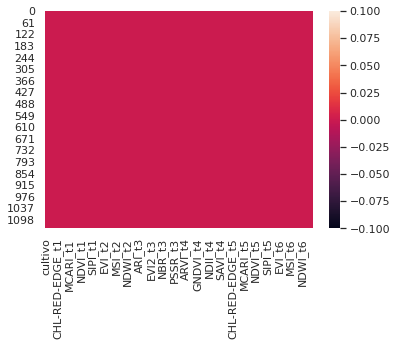

In [263]:
datos_campañas_train = datos_campañas_train.fillna(datos_campañas_train.groupby('cultivo').transform('mean'))
sns.heatmap(datos_campañas_train[datos_campañas_train.columns].isnull())


### Remplazo de outliers por la mediana del grupo

In [264]:
variables = datos_campañas_train.loc[:, (datos_campañas_train.columns != 'cultivo')&(datos_campañas_train.columns != 'camp')].columns


In [266]:

def replace(group, stds):
    group[np.abs(group - group.mean()) > stds * group.std()] = group.median() 
    return group

datos_campañas_train.loc[:, variables] = datos_campañas_train.groupby('cultivo').transform(lambda cultivo: replace(cultivo, 1.5))


### Exploracion de variables 

#### boxplot Indices para cada cultivo en los diferentes puntos de tiempo

In [267]:
ARI = datos_campañas_train.loc[:, datos_campañas_train.columns.str.startswith('PSSR') + datos_campañas_train.columns.str.startswith('cultivo')]

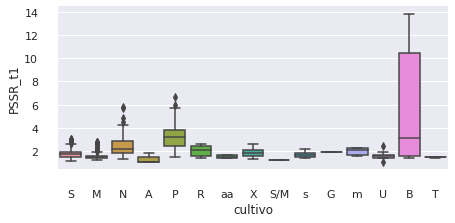

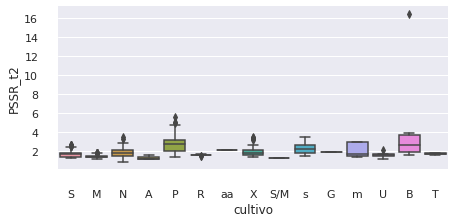

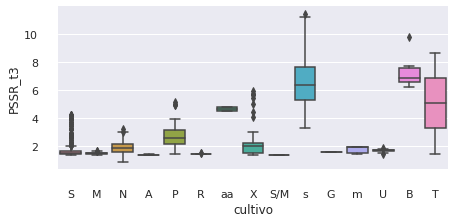

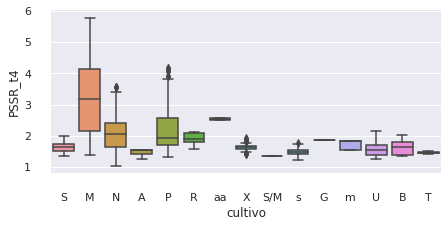

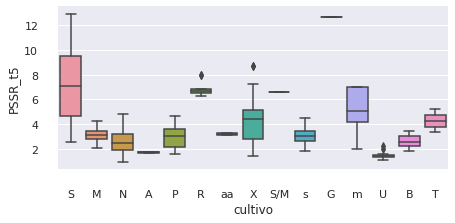

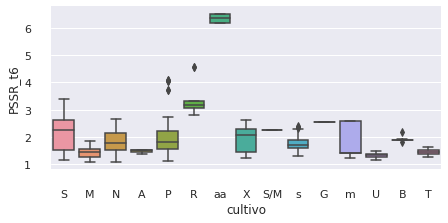

In [268]:
for col in ARI.columns[1:]:
    sns.set()
    fig, ax = plt.subplots()
    sns.boxplot(x="cultivo", y=col,
            data=ARI)
    sns.despine(offset=10, trim=True)
    fig.set_size_inches(7,3)
    
    


#### Histograma de Indices para cada cultivo en los diferentes puntos de tiempo

In [269]:
dfff = datos_campañas_train.copy()

In [270]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder

dfff['cultivo']= LabelEncoder().fit_transform(dfff['cultivo'])
label = dfff['cultivo']

dfff = dfff.drop(['camp', 'cultivo'], axis=1)
cols= dfff.columns

scaler = RobustScaler()

dfff = scaler.fit_transform(dfff)

dfff=pd.DataFrame(dfff)
dfff.columns = cols

dfff = pd.concat([dfff, label], axis=1)


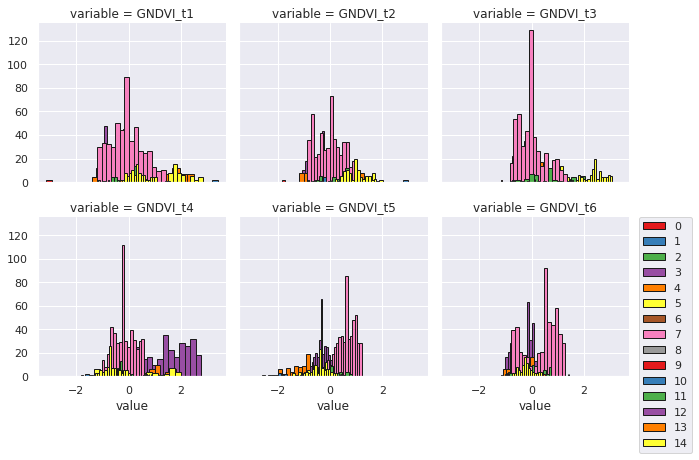

In [273]:

variable = datos_campañas_train.loc[:, datos_campañas_train.columns.str.startswith('GNDVI')]


df2 = pd.melt(dfff, id_vars='cultivo', value_vars= variable, value_name='value')


g = sns.FacetGrid(df2, col="variable", hue="cultivo", palette="Set1", col_wrap=3)
g.map(plt.hist, 'value', bins=15, ec="k")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


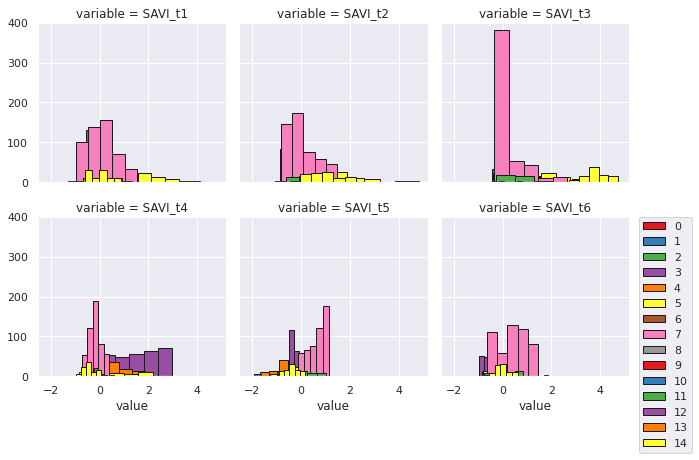

In [272]:
variable = datos_campañas_train.loc[:, datos_campañas_train.columns.str.startswith('SAVI')]


df2 = pd.melt(dfff, id_vars='cultivo', value_vars= variable, value_name='value')


g = sns.FacetGrid(df2, col="variable", hue="cultivo", palette="Set1", col_wrap=3)
g.map(plt.hist, 'value', bins=5, ec="k")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


### Eliminar columnas que no aportan info o indice que se repiten 

In [274]:
lista = ('EVI','EVI2' 'MCARI', 'SIPI')
datos_campañas_train_reducido = datos_campañas_train.drop([x for x in datos_campañas_train if x.startswith(lista)], 1)


### Exportar df

In [275]:
datos_campañas_train_reducido.to_csv('datos_campañas_train_reducido_final.csv')

In [176]:
#datos_campañas_train.to_csv('datos_campañas_train_completo_2p.csv')

### EDA DATOS TEST

In [282]:
lista = ('EVI','EVI2' 'MCARI', 'SIPI')
datos_campañas_test_reducido = datos_campañas_test.drop([x for x in datos_campañas_test if x.startswith(lista)], 1)


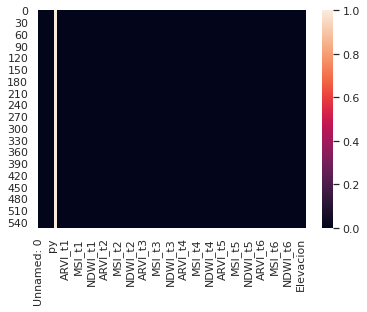

In [283]:
#datos_campañas_train = datos_campañas_train.fillna(datos_campañas_train.groupby('cultivo').transform('mean'))
sns.heatmap(datos_campañas_test_reducido[datos_campañas_test_reducido.columns].isnull())

In [284]:
datos_campañas_test_reducido.to_csv('indices_test_reducido.csv', sep='\t')